<a href="https://colab.research.google.com/github/ReVuz/R_programming/blob/main/q10_and_q11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Suppose you have a dataset containing information about house prices (dependent variable, denoted as price) and the size of the houses (in square feet, independent variable, denoted as size). You want to build a linear regression model to predict house prices based on their size.

Write an R code snippet to perform the following steps:

Load the dataset https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

Fit a simple linear regression model with price as the dependent variable and size as the independent variable.

Calculate the regression coefficients (slope and intercept).
Plot the regression line along with the scatter plot of the data points.


Call:
lm(formula = house_data$SalePrice ~ house_data$GrLivArea, data = house_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-462999  -29800   -1124   21957  339832 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          18569.026   4480.755   4.144 3.61e-05 ***
house_data$GrLivArea   107.130      2.794  38.348  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 56070 on 1458 degrees of freedom
Multiple R-squared:  0.5021,	Adjusted R-squared:  0.5018 
F-statistic:  1471 on 1 and 1458 DF,  p-value: < 2.2e-16


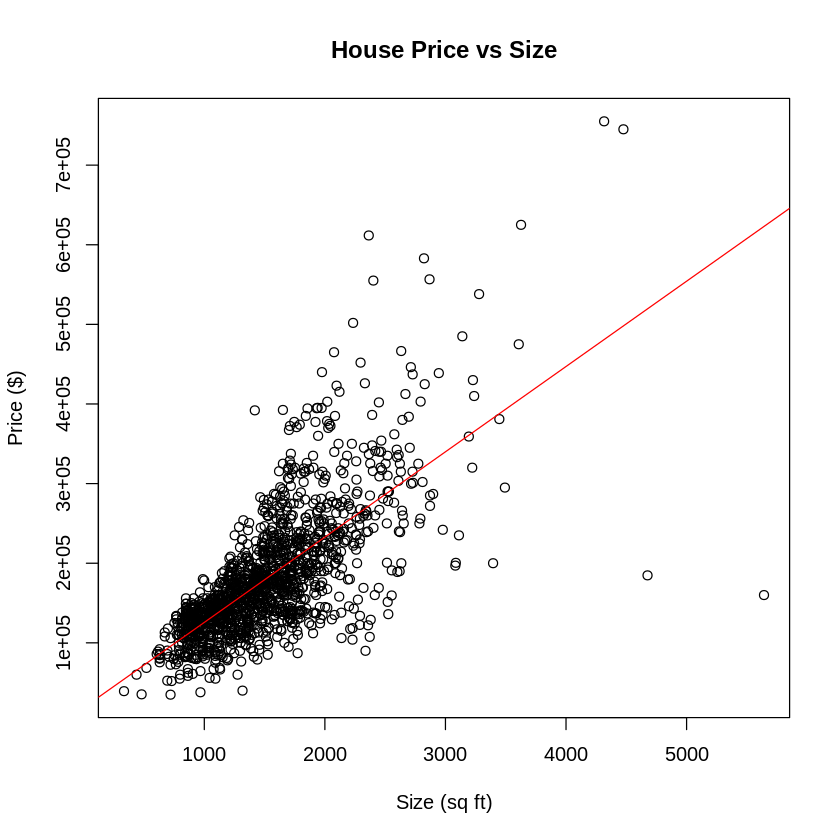

In [9]:
house_data <- read.csv("train.csv")
plot(house_data$GrLivArea, house_data$SalePrice, main = "House Price vs Size", xlab = "Size (sq ft)", ylab = "Price ($)")
model <- lm (house_data$SalePrice ~ house_data$GrLivArea, data = house_data)
summary(model)
abline (model, col = "red")

a) Create an adjacency list representation for a given undirected graph

b) Implement a function to add an edge between two vertices in the graph.

c) Write an R function to perform DFS traversal on a graph starting from a specific vertex.

Reference

https://r.igraph.org/index.html


In [42]:
install.packages("igraph")
install.packages("tidygraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [44]:
library(igraph)
library(tidygraph)

# Create an igraph
# c - d
#   - e
#   - f - b
ig <- graph_from_literal(f-+b, c-+e:f, c-+d)
ig

# Calculate the depth-first search from node "c"
ig_dfs <- graph.dfs(
  ig,
  root = "c",
  neimode = "out",
  father = TRUE,
  order = TRUE,
  unreachable = FALSE,
  dist = TRUE
)

# `$father` is a named vector.  Each item is a node, in the same order as V(ig).
# The values are the indices of each node's parent.  Look the indices up among
# the names to get the name of the parent.  The order of nodes in these vectors
# is arbitrary, the order of the internal storage.

node_ids <- as.numeric(V(ig)) # id of each node, in order of node id
node_names <- names(V(ig)) # name of each node, in order of node id
parent_ids <- as.integer(ig_dfs$father) # id of each node's parent, in order of node id
parent_names <- node_names[ig_dfs$father] # name of each node's parent, in order of node id
node_ids_dfs <- as.numeric(ig_dfs$order) # id of each node, in dfs order
node_names_dfs <- names(ig_dfs$order) # name of each node, in dfs order
parent_ids_dfs <- parent_ids[ig_dfs$order] # id of each node's parent, in dfs order
parent_names_dfs <- parent_names[ig_dfs$order] # name of each node's parent, in dfs order
node_depth <- as.numeric(ig_dfs$dist) # depth of each node
node_depth_dfs <- as.numeric(ig_dfs$dist[node_names_dfs]) # depth of each node, in dfs order

node_names[2] # node name, given node id
parent_ids[2] # parent id, given node id
parent_names[2] # parent name, given node id
node_depth[2] # node depth, given node id
node_ids_dfs[3] # node id, given node's place in the dfs order
node_names_dfs[3] # node name, given node's place in the dfs order
parent_ids_dfs[3] # parent id, given node's place in the dfs order
parent_names_dfs[3] # parent name, given node's place in the dfs order
node_ids[which(parent_ids == 1)] # children ids, given node id
node_names[which(parent_ids == 1)] # children names, given node id
node_ids_dfs[which(node_ids_dfs == node_ids_dfs[3])] # children ids, given node's place in the dfs order
node_names_dfs[which(node_ids_dfs == node_ids_dfs[3])] # children names, given node's place in the dfs order

# Tidygraph resolves it back to node IDs, not to names.
ig |>
  as_tbl_graph() |>
  activate(nodes) |>
  mutate(parent = dfs_parent(root = which(names(V(ig)) == "c")))

IGRAPH a50523b DN-- 5 4 -- 
+ attr: name (v/c)
+ edges from a50523b (vertex names):
[1] f->b c->f c->e c->d

Warning message in graph.dfs(ig, root = "c", neimode = "out", father = TRUE, order = TRUE, :
“Argument `neimode' is deprecated; use `mode' instead”


[1] "b"

[1] 1

[1] "f"

[1] 2

[1] 2

[1] "b"

[1] 1

[1] "f"

[1] 2

[1] "b"

[1] 2

[1] "b"

# A tbl_graph: 5 nodes and 4 edges
#
# A rooted tree
#
# A tibble: 5 × 2
  name  parent
  <chr>  <int>
1 f          3
2 b          1
3 c         NA
4 e          3
5 d          3
#
# A tibble: 4 × 2
   from    to
  <int> <int>
1     1     2
2     3     1
3     3     4
# ℹ 1 more row